In [ ]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=a8f90703fa251034a704d7957301b2bd5df9d9514b3c974fc096f78ba5208140
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


# Stock price prediction using LSTM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,759.429993,760.619995,756.840027,759.130005,759.130005,0
2012-03-13,761.450012,773.030029,761.450012,772.979980,772.979980,0
2012-03-14,773.190002,774.679993,769.280029,771.630005,771.630005,0
2012-03-15,772.380005,776.469971,770.739990,776.419983,776.419983,0
2012-03-16,776.559998,778.099976,775.640015,777.130005,777.130005,0
2012-03-19,777.119995,782.549988,776.070007,780.090027,780.090027,0
2012-03-20,778.030029,778.299988,773.119995,777.369995,777.369995,0
2012-03-21,777.559998,778.650024,774.760010,776.150024,776.150024,0
2012-03-22,773.640015,773.640015,768.000000,770.270020,770.270020,0


In [ ]:
'''
from pandas_ta we'll import some technical indicators that will help us in predicting the price
'''

# adding technical indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)


#adding the target column that we will predict wich is the next closing price
data['TargetNextClose'] = data['Adj Close'].shift(-1)

#cleaning the data
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [ ]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head()
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,TargetNextClose
0,791.440002,795.679993,789.760010,789.760010,46.877256,795.406526,775.179523,762.677734,787.179993
1,789.869995,792.669983,785.640015,787.179993,44.575540,794.623046,775.417156,763.002267,793.440002
2,787.179993,794.020020,786.260010,793.440002,50.849388,794.510376,775.774044,763.405416,801.599976
3,794.580017,801.859985,794.580017,801.599976,57.558969,795.185576,776.285448,763.911304,805.039978
4,800.669983,805.770020,800.669983,805.039978,60.023875,796.124090,776.854845,764.456055,803.330017


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[2.29581669e-02 2.29433745e-02 2.47716068e-02 ... 8.97234280e-05
  0.00000000e+00 2.07597112e-02]
 [2.21376684e-02 2.13759713e-02 2.26157378e-02 ... 2.23202774e-04
  1.85785313e-04 2.40315161e-02]
 [2.07318516e-02 2.20789762e-02 2.29401625e-02 ... 4.23668073e-04
  4.16575636e-04 2.82963401e-02]
 ...
 [7.02928723e-01 7.05303153e-01 6.86247371e-01 ... 8.48490960e-01
  8.97746641e-01 7.12348110e-01]
 [7.10041347e-01 7.14858478e-01 7.06037471e-01 ... 8.46542494e-01
  8.96074968e-01 7.30060848e-01]
 [7.15157700e-01 7.27319645e-01 7.18726764e-01 ... 8.45009566e-01
  8.94682404e-01 7.28696671e-01]]


In [ ]:
# multiple feature from data provided to the model
X = []
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2448
[[[2.29581669e-02 2.29433745e-02 2.47716068e-02 ... 1.38101972e-02
   8.97234280e-05 0.00000000e+00]
  [2.21376684e-02 2.13759713e-02 2.26157378e-02 ... 1.33872827e-02
   2.23202774e-04 1.85785313e-04]
  [2.07318516e-02 2.20789762e-02 2.29401625e-02 ... 1.33264641e-02
   4.23668073e-04 4.16575636e-04]
  ...
  [1.03842190e-02 9.06593181e-03 1.25061612e-02 ... 0.00000000e+00
   0.00000000e+00 2.21429917e-03]
  [1.22865199e-02 1.41534449e-02 1.49655357e-02 ... 4.61538131e-04
   4.20465674e-05 2.30721567e-03]
  [1.57200584e-02 1.35233817e-02 1.58550688e-02 ... 8.02521949e-04
   6.66876018e-05 2.38760384e-03]]

 [[2.21376684e-02 2.13759713e-02 2.26157378e-02 ... 1.33872827e-02
   2.23202774e-04 1.85785313e-04]
  [2.07318516e-02 2.20789762e-02 2.29401625e-02 ... 1.33264641e-02
   4.23668073e-04 4.16575636e-04]
  [2.45991637e-02 2.61614837e-02 2.72937711e-02 ... 1.36909305e-02
   7.10925863e-04 7.06181108e-04]
  ...
  [1.22865199e-02 1.41534449e-02 1.49655357e-02 ... 4.61538131e-04
   4.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)
print(y_test.shape)


(484, 1)


In [ ]:
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

param_grid = {
    'epochs': [10, 15, 20,30,50],
    'batch_size': [15,32, 64, 128],
}

def create_model(activation='relu'):
  model = Sequential([
          layers.LSTM(units=150,input_shape=(backcandles, 8)),
          layers.Dense(32, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(1),
      ])
  model.compile(optimizer = Adam(), loss ='mse', )
  return model

# Create the model
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-22-941042f02d00>:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid ,cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best batch_size:", grid_search.best_params_['batch_size'])
print("Best number of epochs:", grid_search.best_params_['epochs'])


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan na

Best batch_size: 15
Best number of epochs: 10


In [ ]:
#best params are : 15 batch size,10 epochs
model.fit(X_train, y_train, batch_size=15, epochs=10, validation_split = 0.1)

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
print(y_pred.shape)

16/16 [==============================] - 1s 19ms/step
[0.01617605] [0.58137683]
[0.01617605] [0.58120438]
[0.01617605] [0.58292916]
[0.01617605] [0.57508415]
[0.01617605] [0.58856329]
[0.01617605] [0.58750759]
[0.01617605] [0.5871156]
[0.01617605] [0.59118701]
[0.01617605] [0.59328809]
[0.01617605] [0.58867832]
(484, 1)


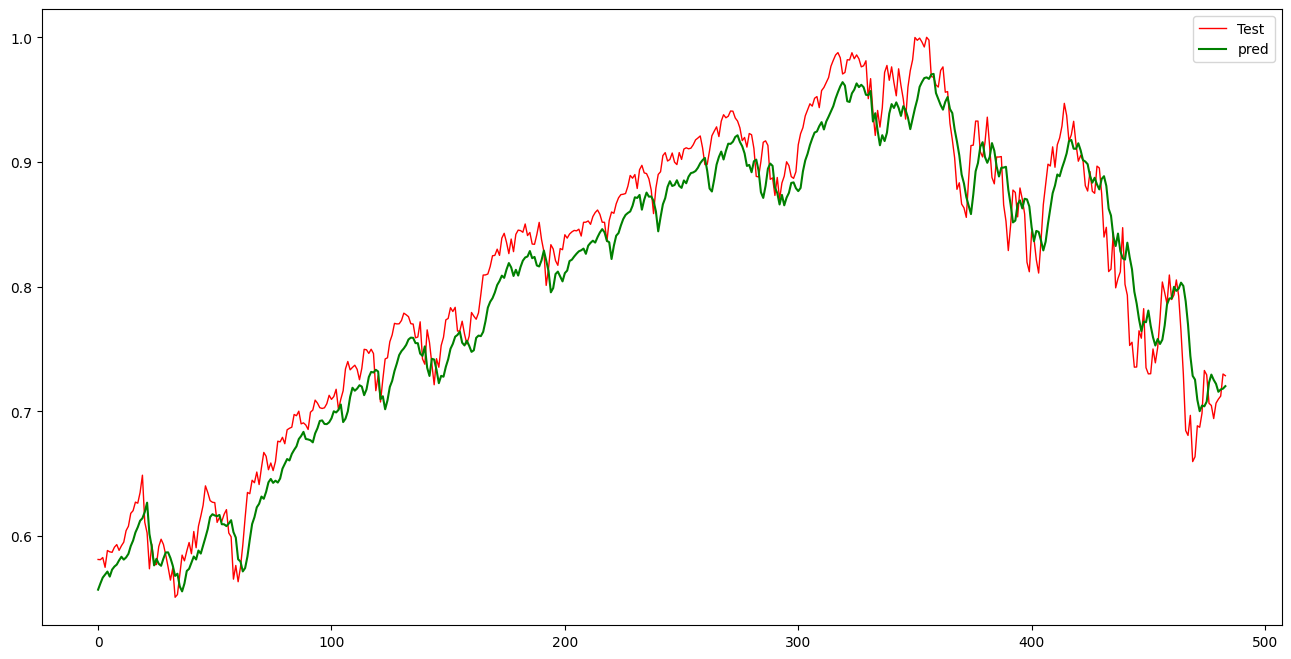

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'red', label = 'Test',linewidth = '1')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

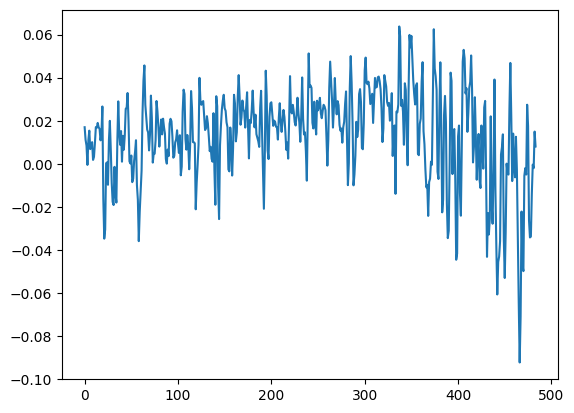

In [ ]:
plt.plot(y_test-y_pred)
plt.show()